### Exercises

#### Question 1

Alongside this notebook is a file `daily_quotes.csv` (the same one that we used for the Pandas exercises).

Using this data write a function that generates a composite of line charts (2 columns wide), that charts the closing price for each symbol in the data.

In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

file = './daily_quotes.csv'

def load_df(file):
    df = pd.read_csv(
        'daily_quotes.csv',
        header=0,
        names=['symbol', 'date', 'close', 'volume', 'open', 'high', 'low'],
        index_col=0,
        parse_dates=['date']
    )
    df = df[['date', 'open', 'high', 'low', 'close', 'volume']]
    return df

data = load_df(file)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508 entries, AAPL to MSFT
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    508 non-null    datetime64[ns]
 1   open    508 non-null    float64       
 2   high    508 non-null    float64       
 3   low     508 non-null    float64       
 4   close   508 non-null    float64       
 5   volume  508 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 27.8+ KB


C:\Users\poaped10\AppData\Local\Temp\ipykernel_27404\2304263880.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


In [6]:
plt.rcParams['figure.figsize'] = [18, 10]
subset = data.loc['AAPL', :]
subset

,date,open,high,low,close,volume
symbol,,,,,,
AAPL,2021-02-12,134.3500,135.5300,133.6921,135.3700,60145130
AAPL,2021-02-11,135.9000,136.3900,133.7700,135.1300,64280030
AAPL,2021-02-10,136.4800,136.9900,134.4000,135.3900,73046560
AAPL,2021-02-09,136.6200,137.8770,135.8500,136.0100,76774210
AAPL,2021-02-08,136.0300,136.9600,134.9200,136.9100,71297210
...,...,...,...,...,...,...
AAPL,2020-08-19,115.9833,117.1625,115.6100,115.7075,145538000
AAPL,2020-08-18,114.3525,116.0000,114.0075,115.5625,105633560
AAPL,2020-08-17,116.0625,116.0875,113.9625,114.6075,119561440


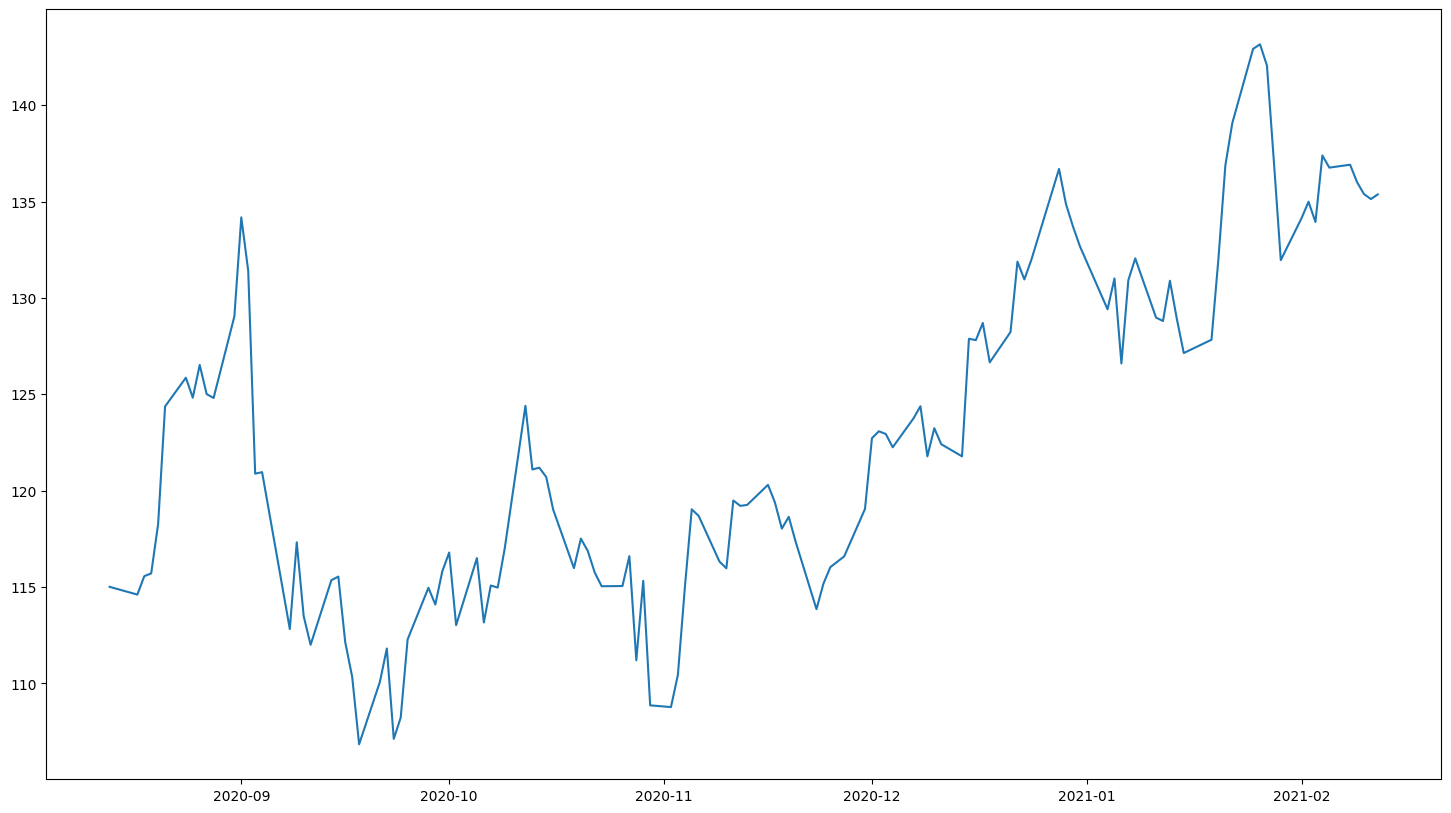

In [12]:
fig, ax = plt.subplots()
p = ax.plot(
    subset['date'].values,
    subset['close'].values,
    label='AAPL'
)
ax.set_title=('APPL')
None

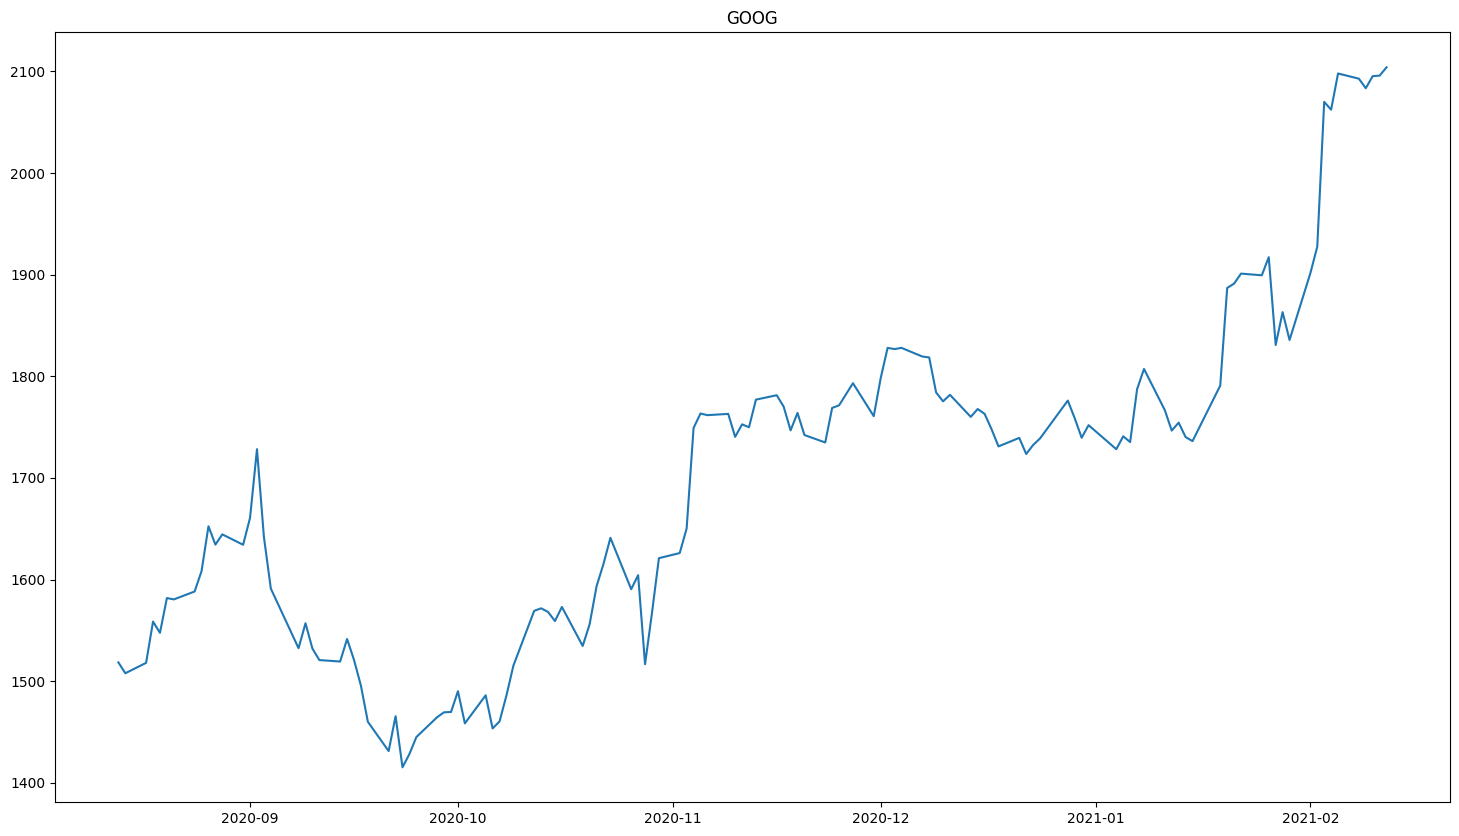

In [18]:
def add_chart(data, symbol, ax):
    subset = data.loc[symbol, :]
    ax.plot(
        subset['date'].values,
        subset['close'].values,
        label=symbol
    )
    ax.set_title(symbol)

fig, ax = plt.subplots()
add_chart(data, 'GOOG', ax)

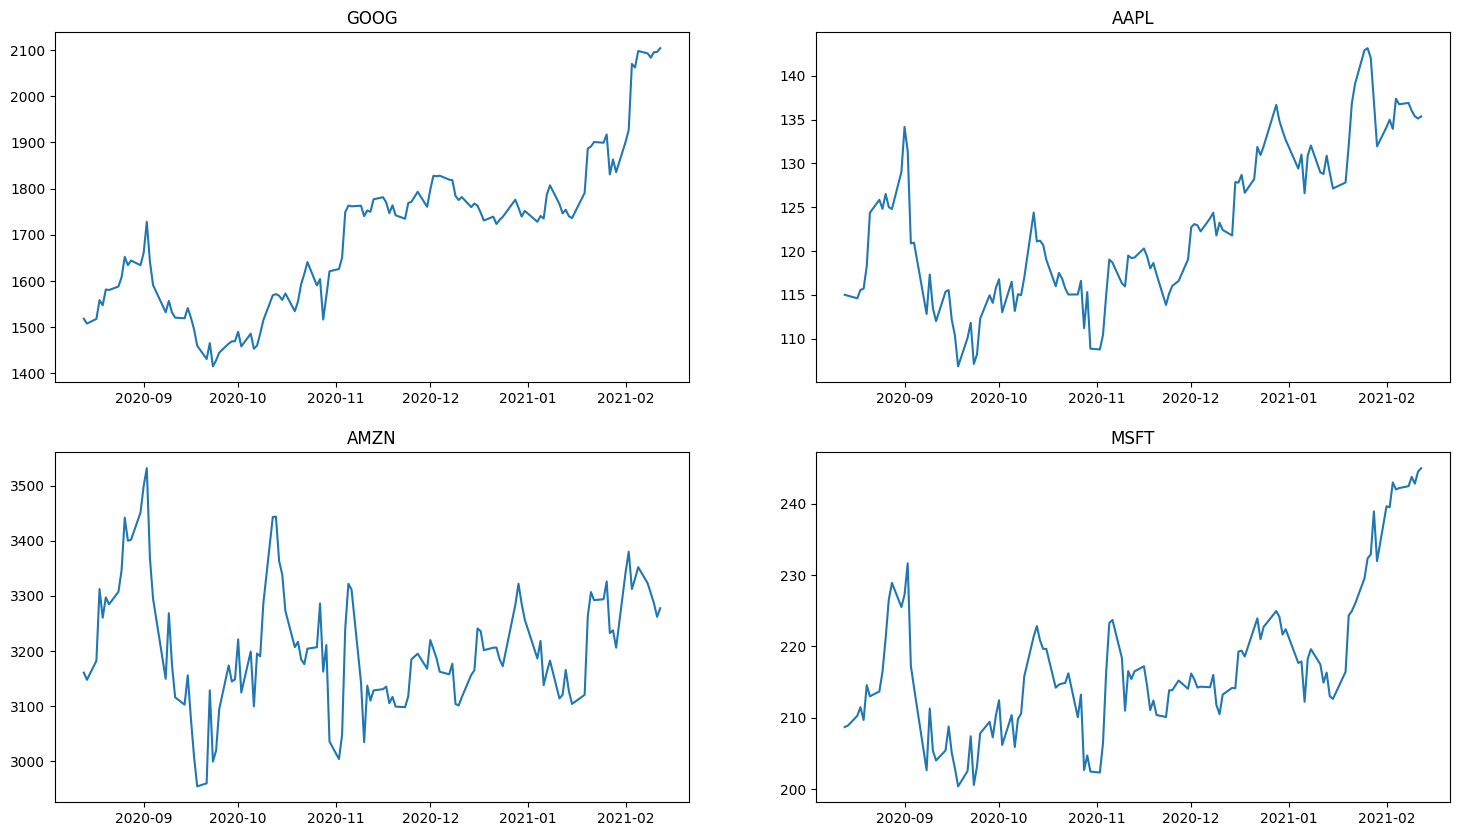

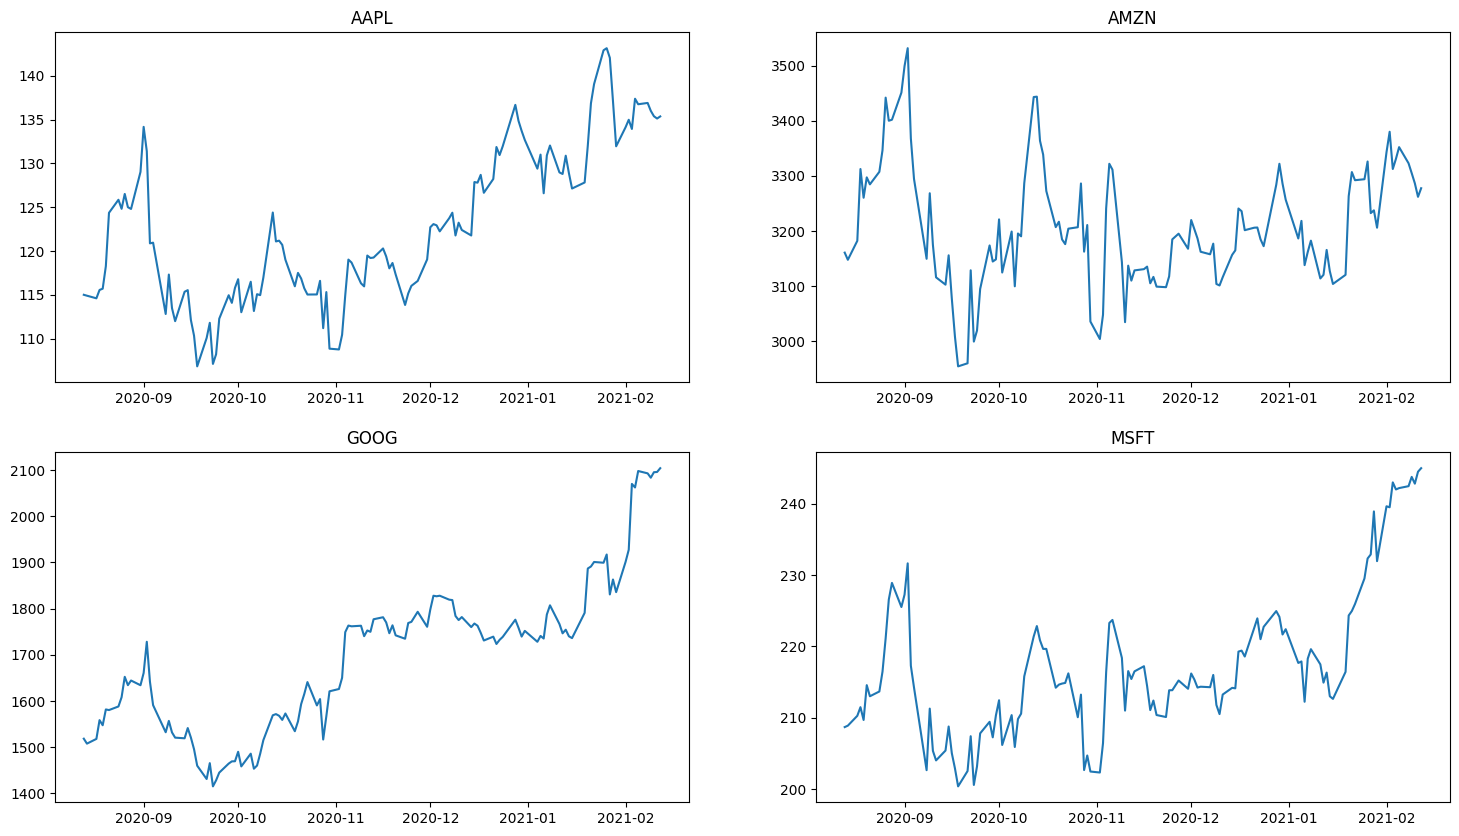

In [27]:
def chart_symbols(data, num_cols=2):
    symbols = sorted(set(data.index))
    num_rows = len(symbols) // num_cols + len(symbols) % num_cols
    fig, axes = plt.subplots(num_rows, num_cols)
    for ax, symbol in zip(axes.reshape(axes.size), symbols):
        add_chart(data, symbol, ax)

chart_symbols(data)

### Question 2

Expand on your previous function to include an `n`-day moving average on each chart. (When you calculate the moving average, be careful with the order of the data in each subset of data).

In [28]:
def add_chart(data, symbol, ax, mavg_window_n):
    subset = data.loc[symbol, :].sort_values('date')
    ma = subset['close'].rolling(window=mavg_window_n).mean()
    ax.plot(
        subset['date'].values,
        subset['close'].values,
        label='close'
    )
    ax.plot(
        subset['date'].values,
        ma,
        label=f'MA-{mavg_window_n}'
    )
    ax.set_title(symbol)
    ax.legend()

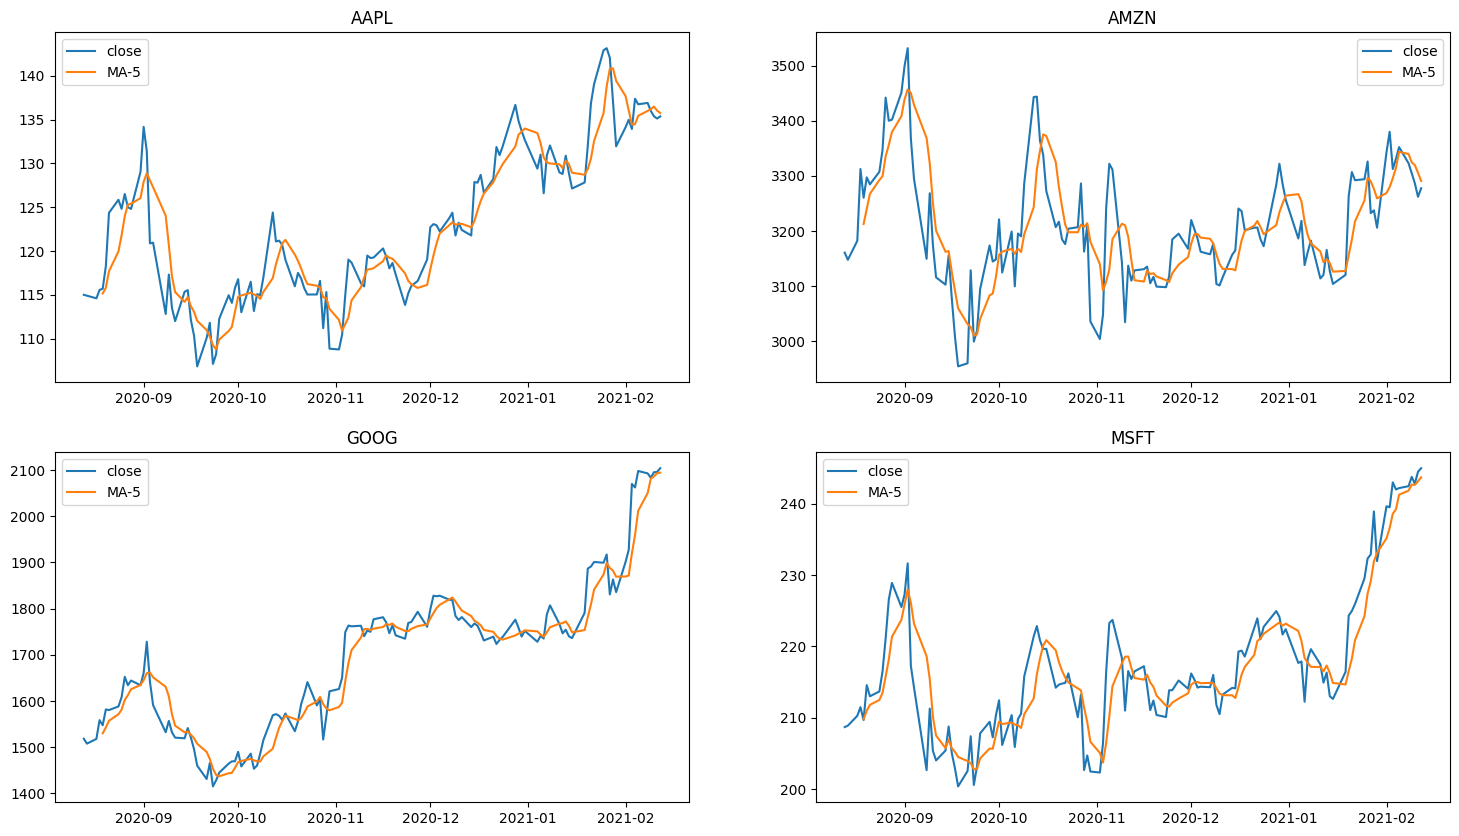

In [30]:
def chart_symbols(data, num_cols=2, mavg_window_n=5):
    symbols = sorted(set(data.index))
    num_rows = len(symbols) // num_cols + len(symbols) % num_cols
    fig, axes = plt.subplots(num_rows, num_cols)
    for ax, symbol in zip(axes.reshape(axes.size), symbols):
        add_chart(data, symbol, ax, mavg_window_n)

chart_symbols(data)

### Question 3

Using the previous charts, add horizontal lines for the 25th, 50th and 75th percentiles of the close price (calculated over the entire time period).